# Manejo de Datos Faltantes: Detección

## Preparacion de entorno

In [1]:
pip install -r requirements.txt

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


***Importar librerías***

In [2]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

### Importar funciones personalizadas

In [3]:
%run pandas-missing-extension.ipynb

***Configurar el aspecto general de las gráficas del proyecto***

In [4]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [5]:
# Saving the link into a variable
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

# Downloading the csv file
!wget -O ./data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

In [6]:
diabetes_df = pd.read_csv(
    "./data/pima-indians-diabetes.csv",
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

diabetes_df.head()

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree_function  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1

### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [7]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
dataset_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [8]:
datasets_dfs = {}

for dataset_name in dataset_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"

    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### Incluir conjuntos de datos en nuestro ambiente local

In [9]:
locals().update(**datasets_dfs)
del datasets_dfs

#### Verificar carga

In [10]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

***Note que la variable state tiene 245 valores no nulos, mientras que la variable pregnant tiene 30***

***la variable pregnant parece tener muchos valores no nulos, vamos a investigar?***

In [11]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

## Tabulación de valores faltantes

#### Número total de valores completos (sin observaciones faltantes)

In [12]:
riskfactors_df.missing.number_complete()

7144

#### Número total de valores faltantes

In [13]:
riskfactors_df.missing.number_missing()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [14]:
riskfactors_df.missing.missing_variable_summary()

variable  n_missing  n_cases  pct_missing
0              state          0      245     0.000000
1                sex          0      245     0.000000
2                age          0      245     0.000000
3         weight_lbs         10      245     4.081633
4        height_inch          2      245     0.816327
5                bmi         11      245     4.489796
6            marital          1      245     0.408163
7           pregnant        215      245    87.755102
8           children          0      245     0.000000
9          education          1      245     0.408163
10        employment          0      245     0.000000
11            income          0      245     0.000000
12           veteran          3      245     1.224490
13          hispanic          2      245     0.816327
14    health_general          0      245     0.000000
15   health_physical          0      245     0.000000
16     health_mental          0      245     0.000000
17       health_poor        113      245    46.122449
18      health_cover          0      245     0.000000
19      provide_care          3      245     1.224490
20  activity_limited          3      245     1.224490
21         drink_any          2      245     0.816327
22        drink_days        134      245    54.693878
23     drink_average        135      245    55.102041
24         smoke_100          2      245     0.816327
25        smoke_days        128      245    52.244898
26        smoke_stop        212      245    86.530612
27        smoke_last        161      245    65.714286
28        diet_fruit          8      245     3.265306
29        diet_salad          8      245     3.265306
30       diet_potato          8      245     3.265306
31       diet_carrot          8      245     3.265306
32    diet_vegetable          8      245     3.265306
33        diet_juice          8      245     3.265306

###### Tabulación del resumen por variable

In [15]:
riskfactors_df.missing.missing_variable_table()

n_missing_in_variable  n_variables  pct_variables
0                       0           10      29.411765
1                       8            6      17.647059
2                       2            4      11.764706
3                       3            3       8.823529
4                       1            2       5.882353
5                      10            1       2.941176
6                      11            1       2.941176
7                     113            1       2.941176
8                     128            1       2.941176
9                     134            1       2.941176
10                    135            1       2.941176
11                    161            1       2.941176
12                    212            1       2.941176
13                    215            1       2.941176

#### Casos / Observaciones / Filas

##### Resúmenes por caso (muestra valores nulos por row)

In [16]:
riskfactors_df.missing.missing_case_summary()

case  n_missing  pct_missing
0       0          6    16.666667
1       1          6    16.666667
2       2          7    19.444444
3       3         12    33.333333
4       4          5    13.888889
..    ...        ...          ...
240   240          6    16.666667
241   241          5    13.888889
242   242          3     8.333333
243   243          2     5.555556
244   244          3     8.333333

[245 rows x 3 columns]

###### Tabulación del resumen por caso

In [17]:
riskfactors_df.missing.missing_case_table()

n_missing_in_case  n_cases   pct_case
0                   4       49  20.000000
1                   5       45  18.367347
2                   7       39  15.918367
3                   6       36  14.693878
4                   2       31  12.653061
5                   3       30  12.244898
6                   1        4   1.632653
7                   8        3   1.224490
8                  12        3   1.224490
9                  15        2   0.816327
10                  9        1   0.408163
11                 10        1   0.408163
12                 11        1   0.408163

### Intervalos de valores faltantes

In [18]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",            # variable a analizar
        span_every=50                     # intervalos a romper la variable
    )
)

span_counter  n_missing  n_complete  pct_missing  pct_complete
0             0          1          49     2.000000     98.000000
1             1          5          45    10.000000     90.000000
2             2          1          49     2.000000     98.000000
3             3          1          49     2.000000     98.000000
4             4          2          43     4.444444     95.555556

### _Run length_ de valores faltantes

*Detecta automáticamente el conteo seguido de variables nulas*

In [19]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)

run_length     is_na
0           14  complete
1            1   missing
2           45  complete
3            1   missing
4            5  complete
5            1   missing
6           12  complete
7            1   missing
8           10  complete
9            2   missing
10          40  complete
11           1   missing
12          53  complete
13           1   missing
14          14  complete
15           1   missing
16          31  complete
17           1   missing
18          11  complete

## Visualización inicial de valores faltantes

### Variable

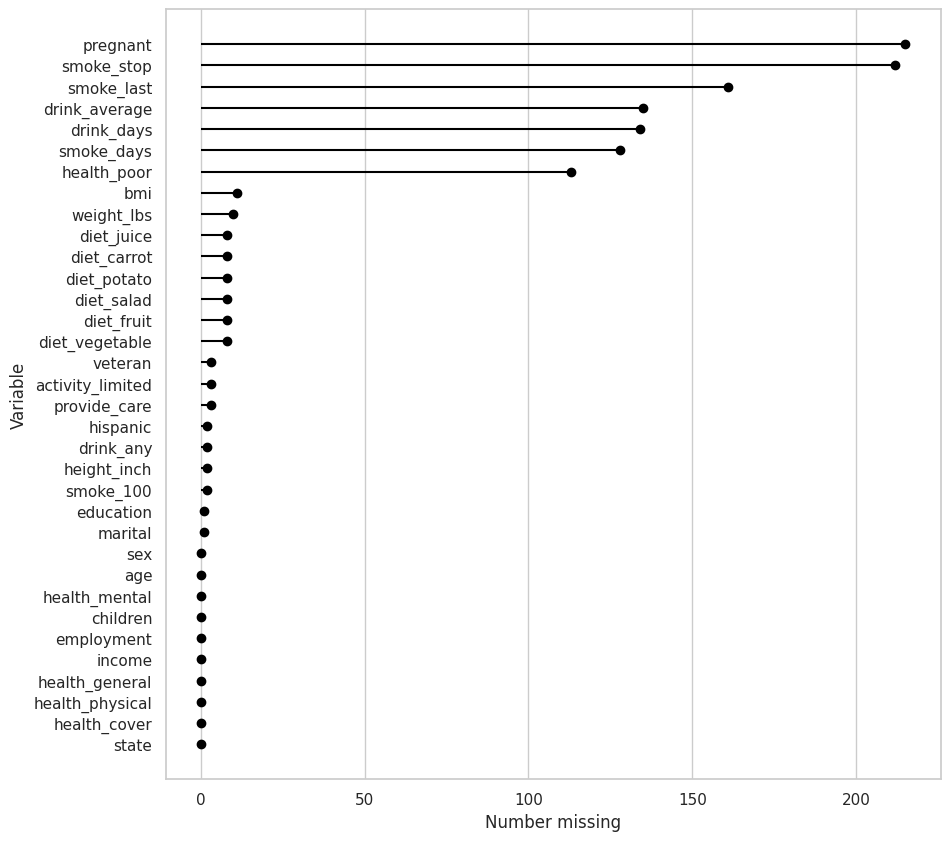

In [20]:
riskfactors_df.missing.missing_variable_plot()

### Casos / Observaciones / Filas

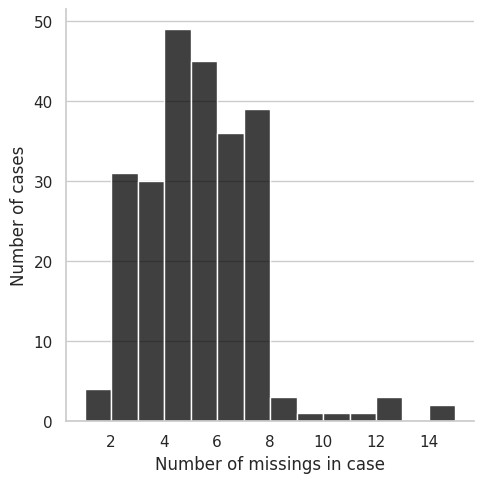

In [21]:
riskfactors_df.missing.missing_case_plot()

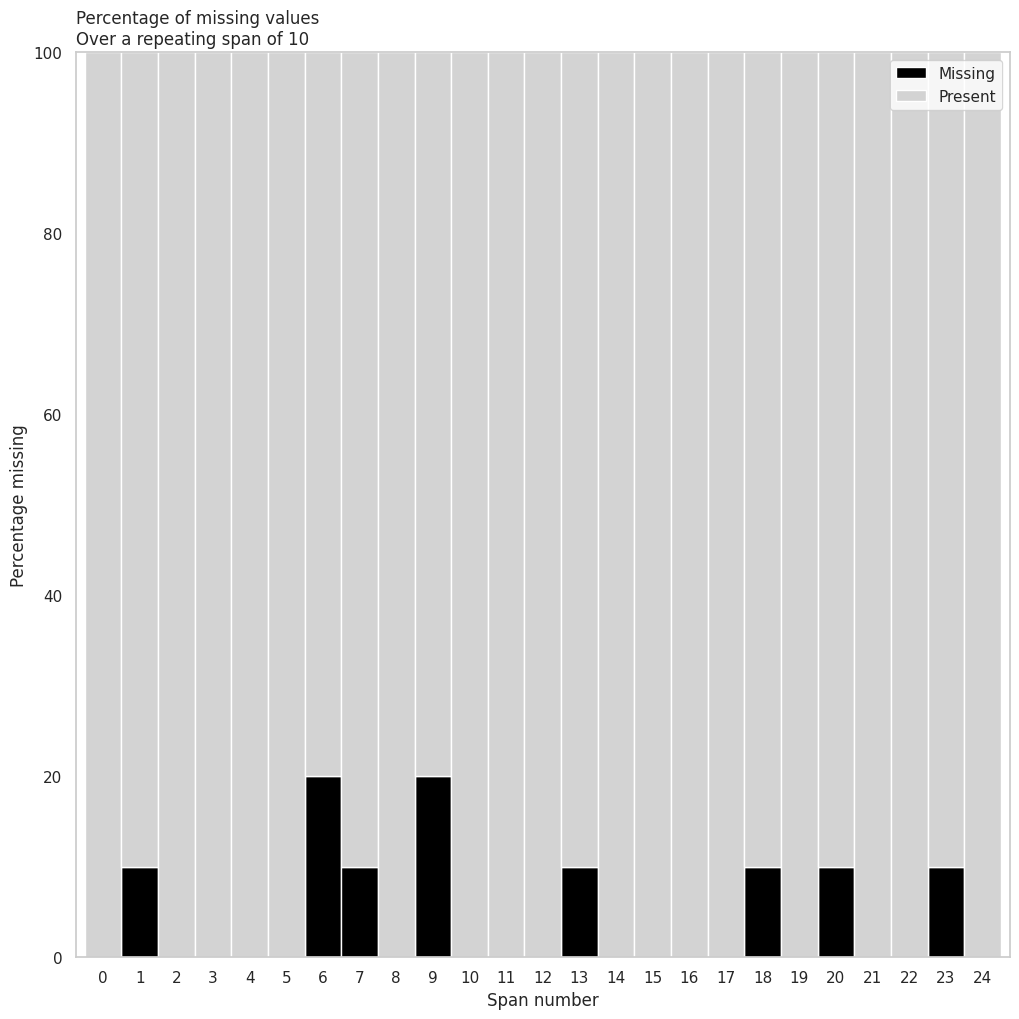

In [22]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=10,
        rot = 0     # label rotation
    )
)

***Que tan completas están nuestras variables?***

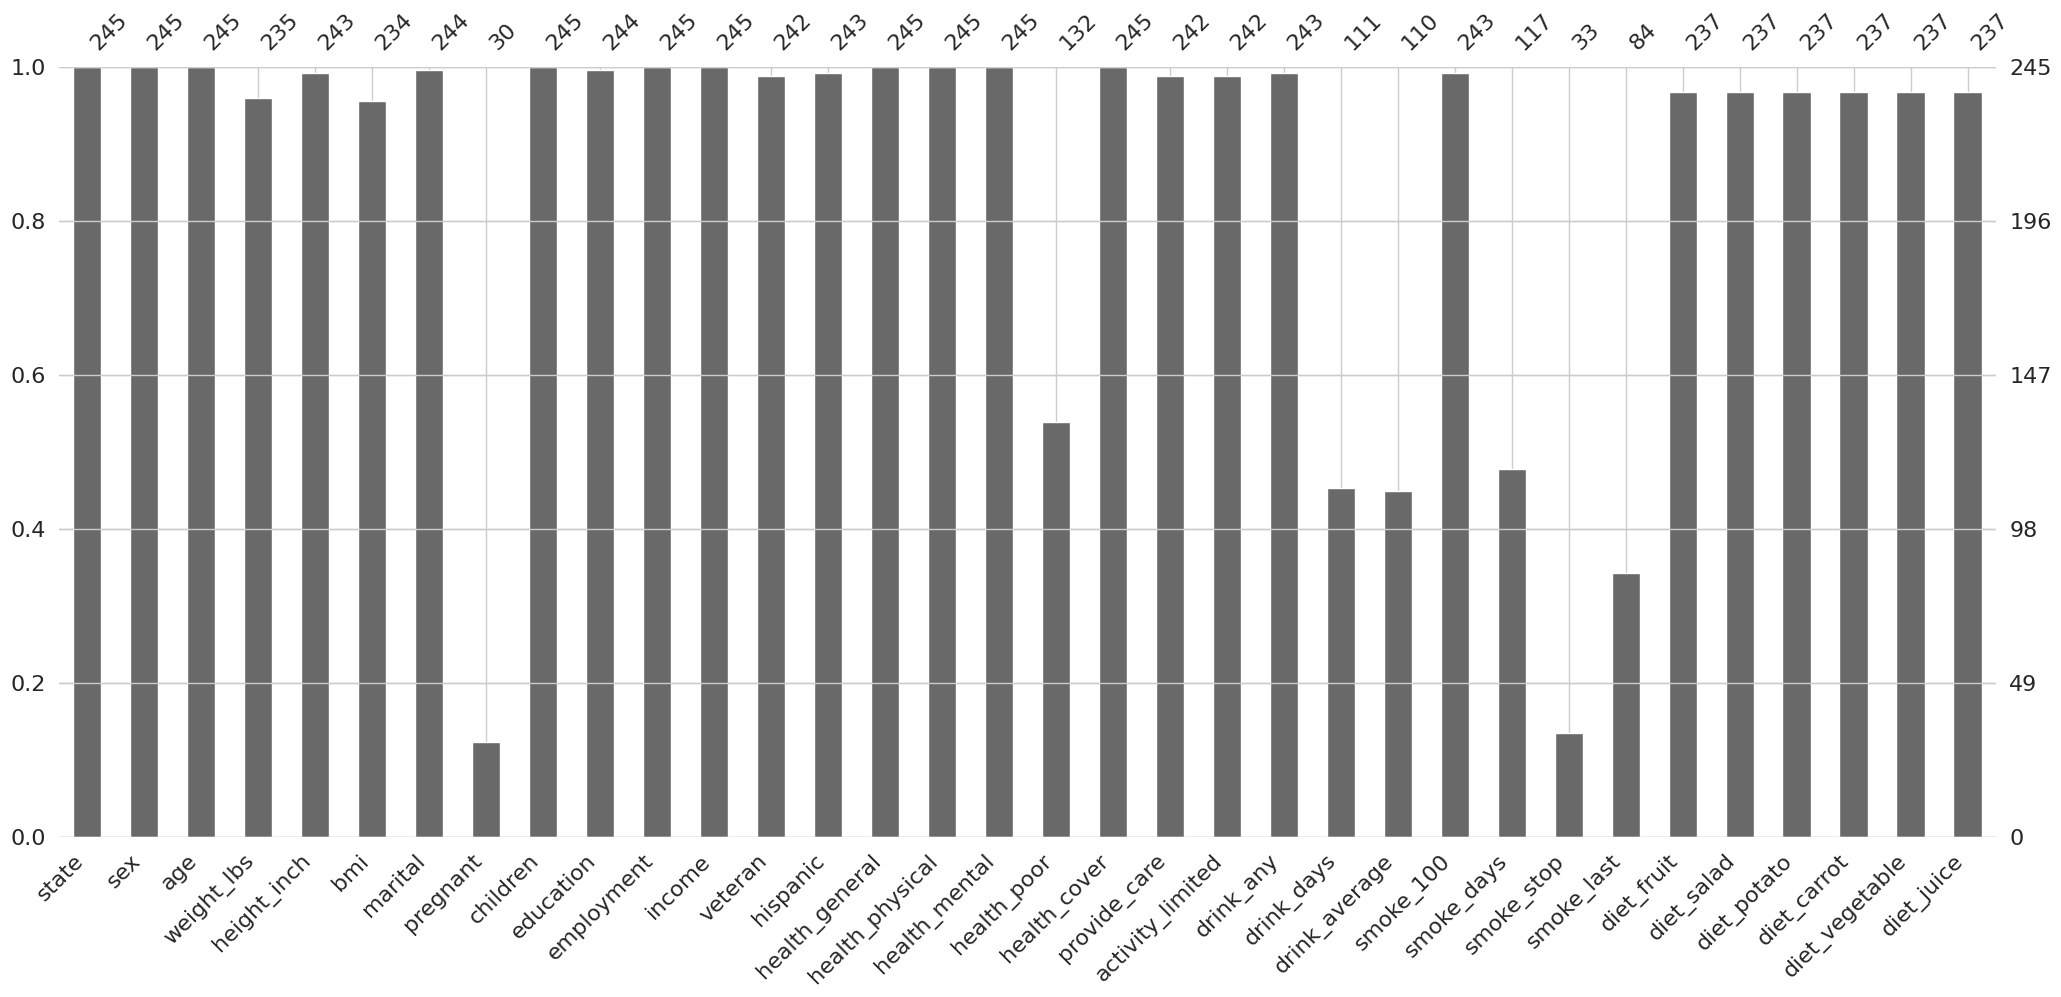

In [23]:
missingno.bar(df = riskfactors_df);

/root/venv/lib/python3.9/site-packages/missingno/missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/root/venv/lib/python3.9/site-packages/missingno/missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


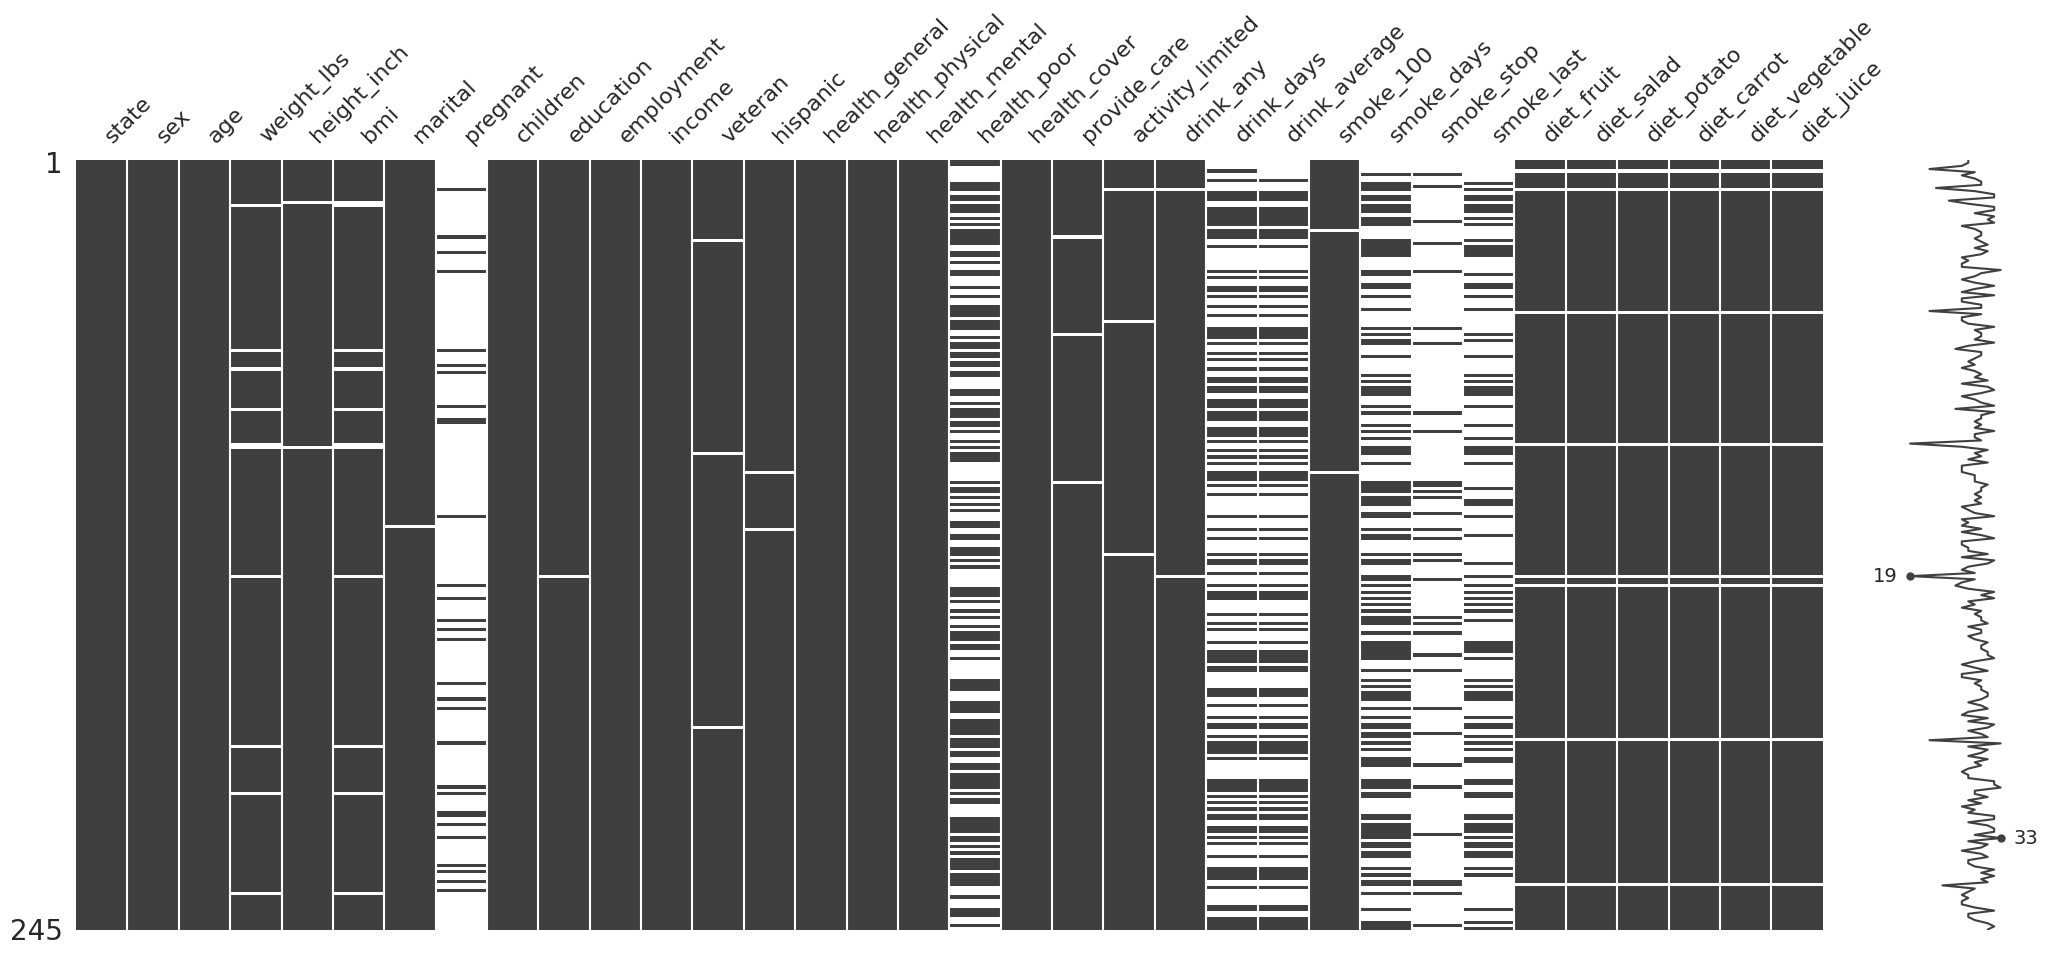

In [24]:
missingno.matrix(df=riskfactors_df);

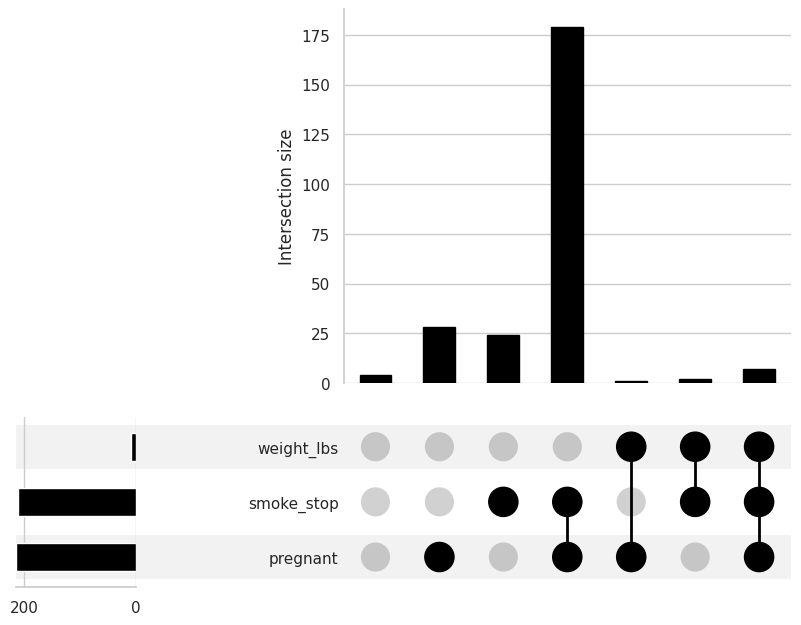

In [25]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=["pregnant","weight_lbs","smoke_stop"],  # Put the target variable name
        # alternatively, put none to see all variables
        
        element_size = 60    # This one specifies the size of the figure that you want to create
    )
);

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [26]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [27]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [28]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

x    y    z
0    1    A -100
1    3  N/A  -99
2   NA   NA  -98
3  -99    E -101
4  -98    F   -1
5  -99    G   -1

***Ya sabemos que hay valores faltantes***

***Será que Pandas los detecta?***

In [29]:
missing_data_example_df.isna()

x      y      z
0  False  False  False
1  False  False  False
2  False  False  False
3  False  False  False
4  False  False  False
5  False  False  False

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [30]:
pd.read_csv(
    "./data/missing_data_enconding_example.csv",
    na_filter=True,
    na_values=[-99, -1]
)

x    y      z
0   1.0    A -100.0
1   3.0  NaN    NaN
2   NaN  NaN  -98.0
3   NaN    E -101.0
4 -98.0    F    NaN
5   NaN    G    NaN

#### Sustitución global

In [31]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99, "NA"],
        value=np.nan
    )
)

x    y      z
0   1.0    A -100.0
1   3.0  N/A    NaN
2   NaN  NaN  -98.0
3   NaN    E -101.0
4 -98.0    F   -1.0
5   NaN    G   -1.0

#### Sustitución dirigida

Sustituir solamente en una columna

In [32]:
(
    missing_data_example_df
    .replace(
        to_replace={
            "x":{-99:np.nan}
        }
    )
)

x    y    z
0    1    A -100
1    3  N/A  -99
2   NA   NA  -98
3  NaN    E -101
4  -98    F   -1
5  NaN    G   -1

## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [33]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night    NaN
3  zelda    morning  320.0

Note que implicitamente hay valores faltantes, ***por que zelda no tiene valores para afternoon & night?***

### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [34]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index="name",
        names_from="time",
        values_from="value"
    )
)

name  afternoon  morning  night
0   lynn      310.0    350.0    NaN
1  zelda        NaN    320.0    NaN

#### Cuantificar ocurrencias de n-tuplas

In [35]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"]
    )
    .reset_index(name="n")
    .query("n<3")
)

name  n
1  zelda  1

### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [36]:
(
    implicit_to_explicit_df

    #janitor
    .complete(
        "name",
        "time"
    )
)

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night    NaN
3  zelda    morning  320.0
4  zelda  afternoon    NaN
5  zelda      night    NaN

#### Limitar la exposición de n-tuplas de valores faltantes

In [37]:
(
    implicit_to_explicit_df

    #janitor
    .complete(
        {"name":["lynn", "zelda"]},
        {"time":["morning", "afternoon"]},
        sort=True
    )
)

name       time  value
0   lynn  afternoon  310.0
1   lynn    morning  350.0
2  zelda  afternoon    NaN
3  zelda    morning  320.0
4   lynn      night    NaN

#### Rellenar los valores faltantes

In [38]:
(
    implicit_to_explicit_df

    #janitor
    .complete(
        "name",
        "time",
        fill_value = np.nan    #aqui se puede poner cualquier valor para los nulos
    )
)

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night    NaN
3  zelda    morning  320.0
4  zelda  afternoon    NaN
5  zelda      night    NaN

#### Limitar el rellenado de valores faltantes implícitos

In [39]:
(
    implicit_to_explicit_df

    #janitor
    .complete(
        "name",
        "time",
        fill_value = 0,
        explicit=False
    )
)

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night    NaN
3  zelda    morning  320.0
4  zelda  afternoon    0.0
5  zelda      night    0.0

## Tipos de valores faltantes

***Usando el DF de diabetes, determine si hay valores faltantes***

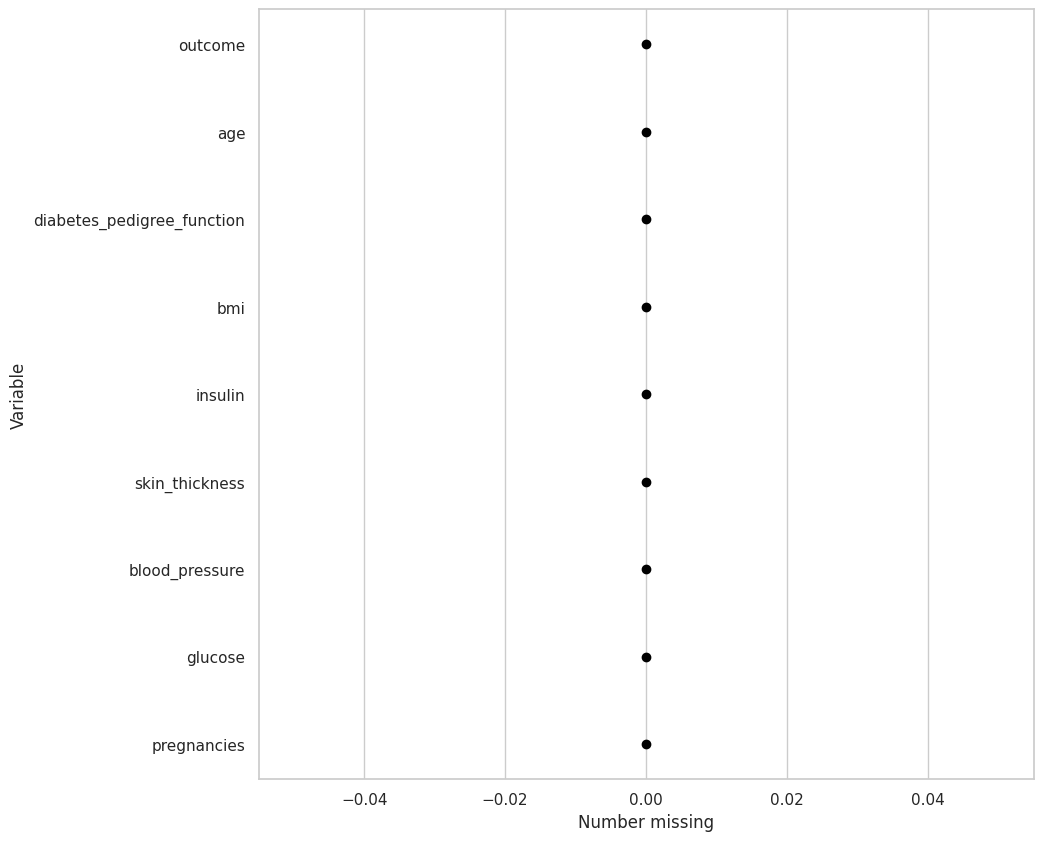

In [40]:
diabetes_df.missing.missing_variable_plot()

This chart is basically saying that there are no missing values, which is false. The problem is that the missing values are in a different format

The missing values are shown as a zero, let's change them into numpy nan

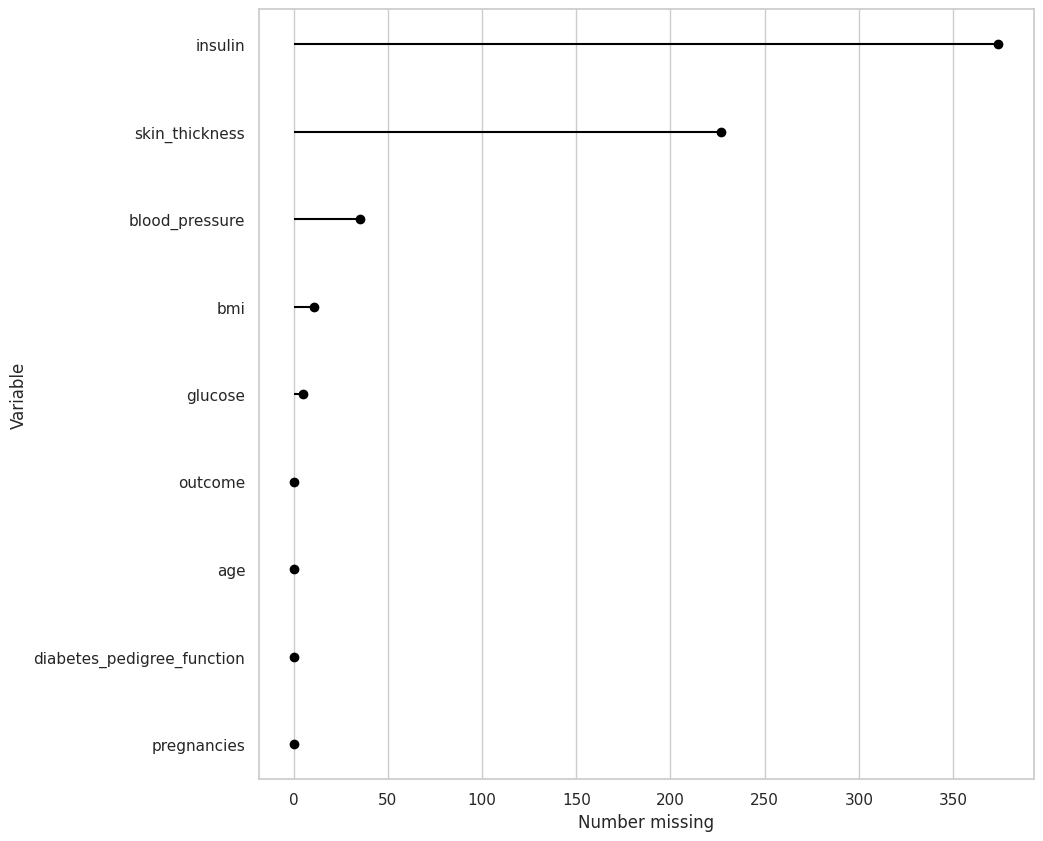

In [41]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()

### _Missing Completely At Random_ (MCAR)

/root/venv/lib/python3.9/site-packages/missingno/missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/root/venv/lib/python3.9/site-packages/missingno/missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot:>

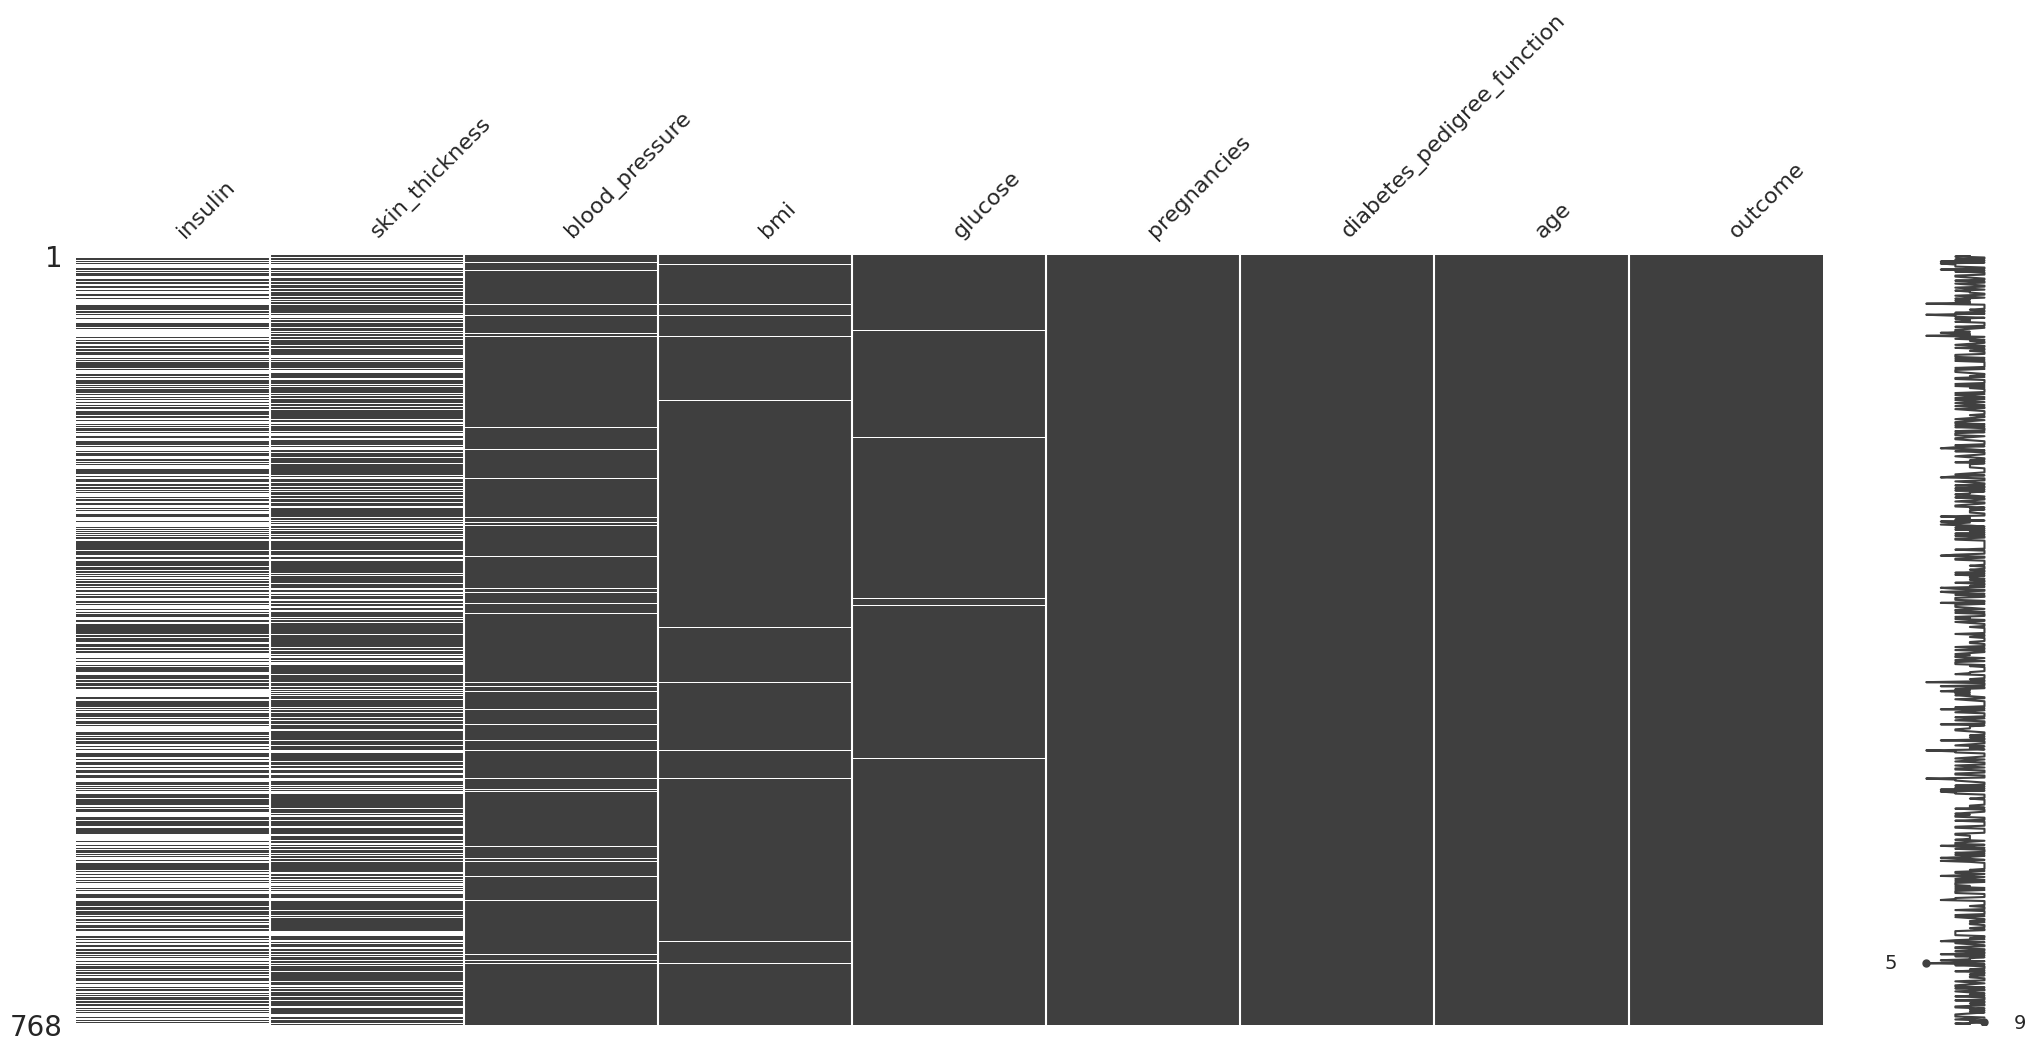

In [42]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

***Se ordenan las columnas tal que las que tienen mas valores faltantes aparecen primero.***

### _Missing At Random_ (MAR)

/root/venv/lib/python3.9/site-packages/missingno/missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/root/venv/lib/python3.9/site-packages/missingno/missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot:>

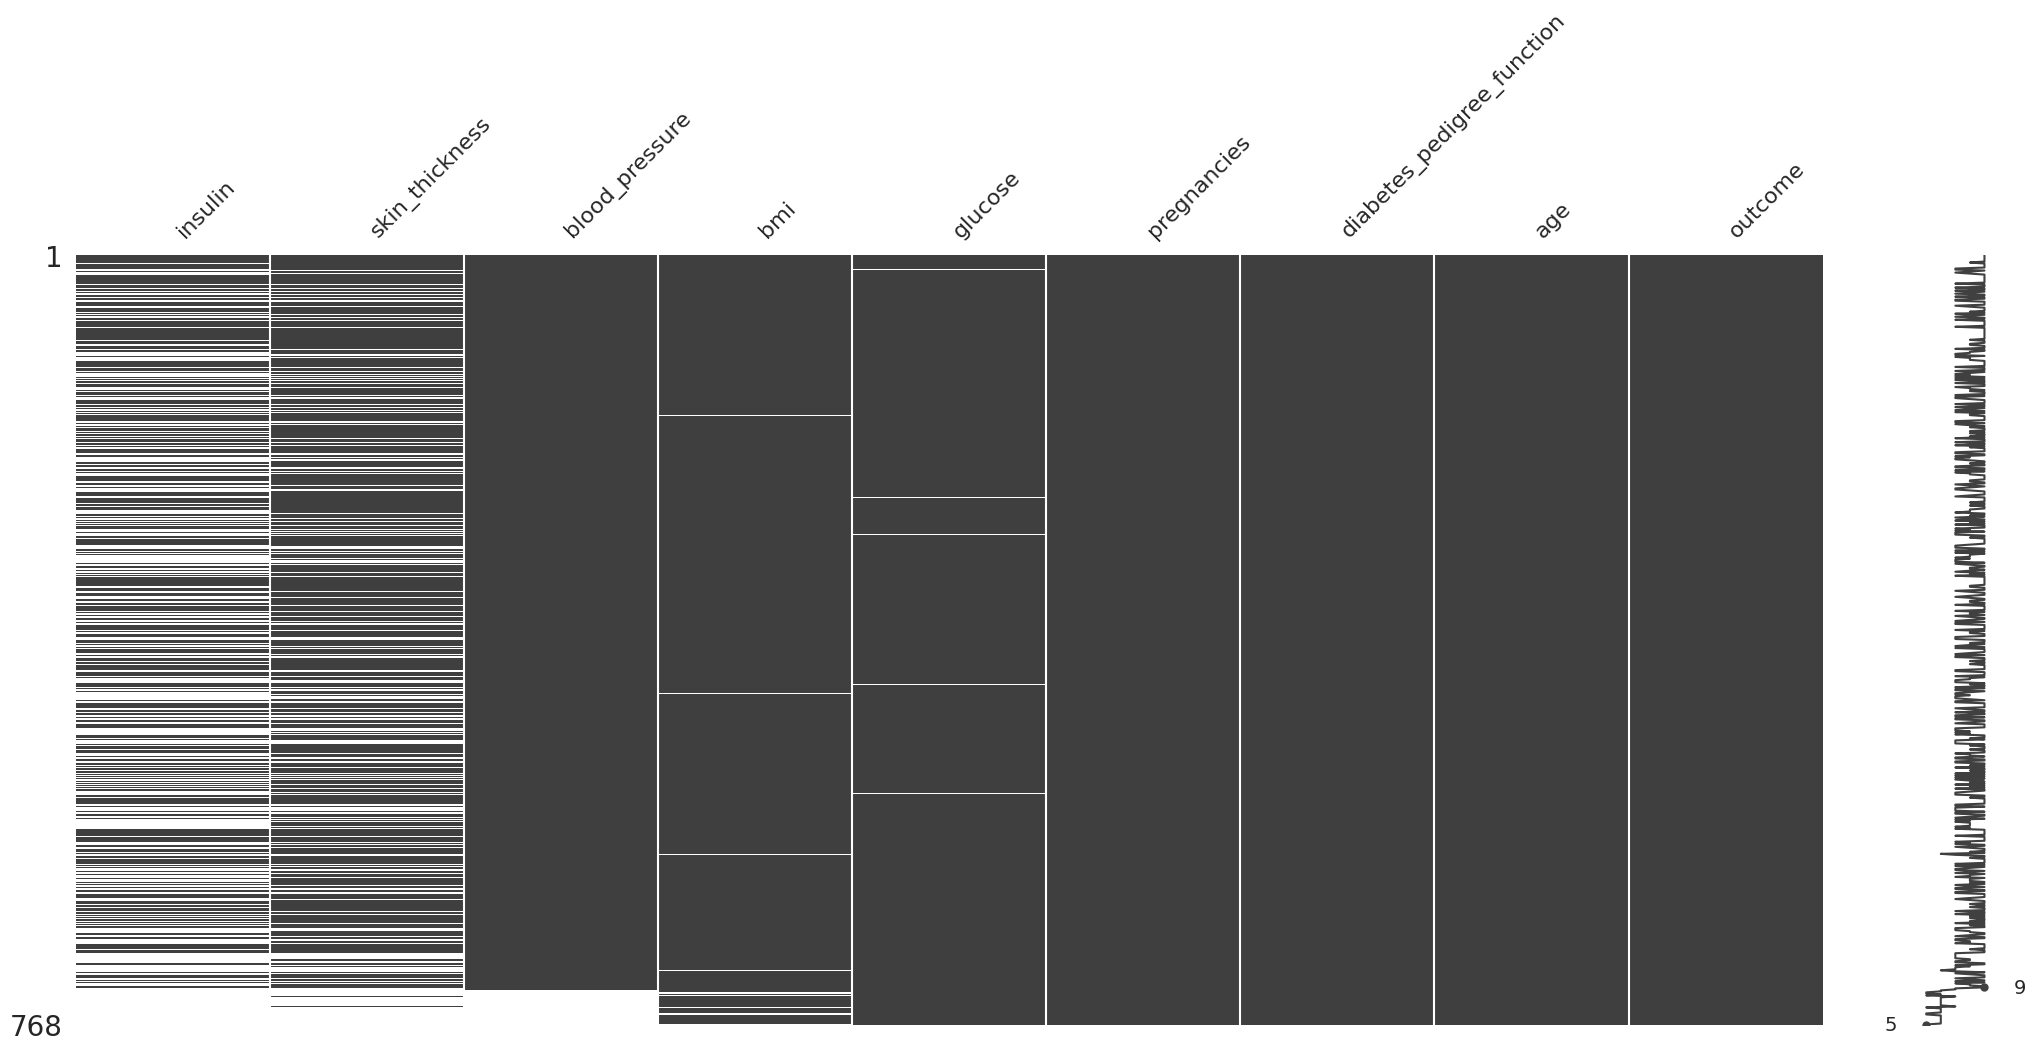

In [43]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="blood_pressure")
    .pipe(missingno.matrix)
)

***Aqui se puede empezar a inferir que puede haber una relacion entre la presion sanguinea y los datos faltantes***

### _Missing Not At Random_ (MNAR)

/root/venv/lib/python3.9/site-packages/missingno/missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/root/venv/lib/python3.9/site-packages/missingno/missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot:>

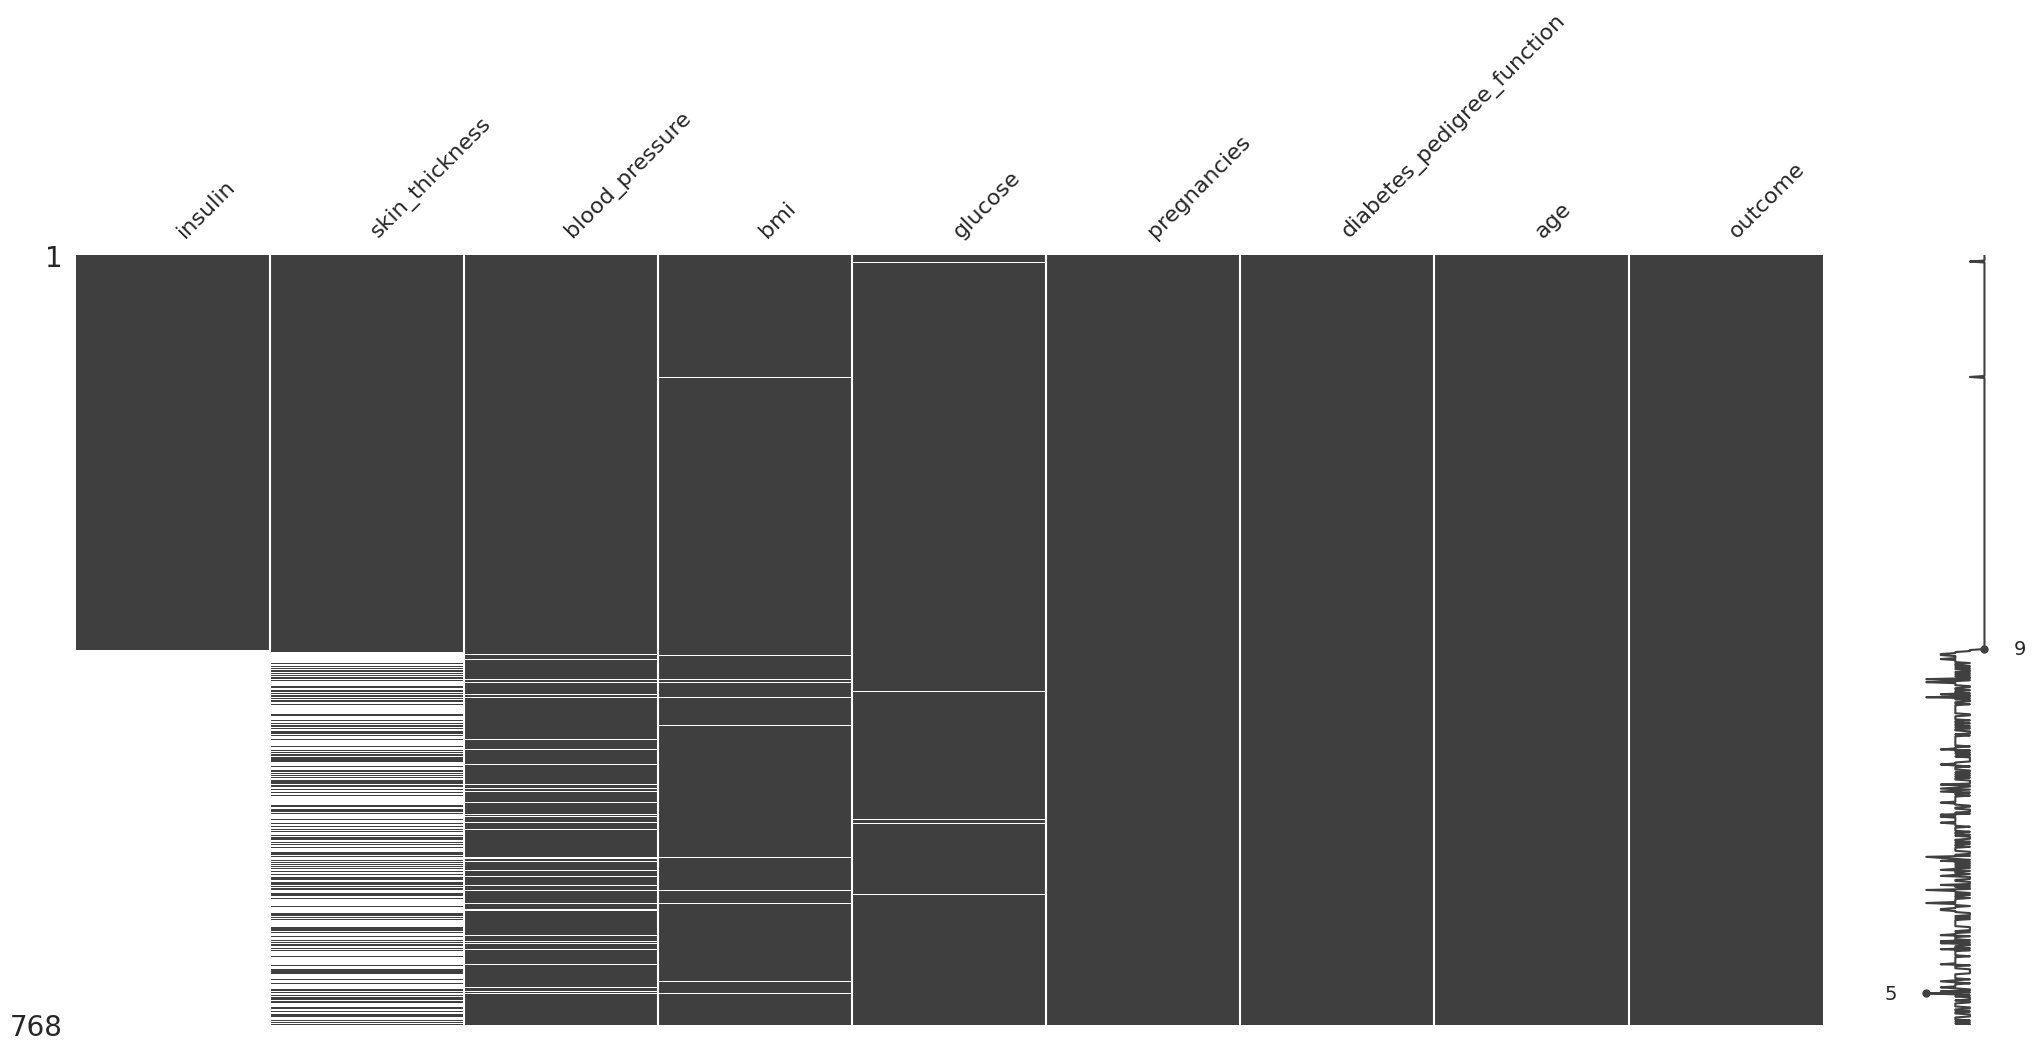

In [44]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="insulin")
    .pipe(missingno.matrix)
)

Aqui podemos observar que este error es sistematico. Siempre que se colectan los datos de insulina, tambien se colectan el resto de datos. A su vez, cuando no se colectan los datos de insulina, tienden a haber datos faltantes en las otras variables

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

In [45]:
(
    riskfactors_df
    .isna()
    .replace({
        False:"Not missing",
        True:"Missing"
    })
    .add_suffix("_NA")
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis="columns"
        )
    )
)

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100_NA smoke_days_NA smoke_stop_NA  \
0           0         6  ...  Not missing       Missing       Missing   
1           0         5  ...  Not missing       Missing       Missing   
2           0         4  ...  Not missing       Missing       Missing   
3           1         6  ...  Not missing       Missing       Missing   
4           0         5  ...  Not missing   Not missing   Not missing   
..        ...       ...  ...          ...           ...           ...   
240         0         4  ...  Not missing       Missing       Missing   
241         2         4  ...  Not missing       Missing       Missing   
242         0         6  ...  Not missing   Not missing       Missing   
243         0         4  ...  Not missing   Not missing   Not missing   
244         0         4  ...  Not missing   Not missing       Missing   

    smoke_last_NA diet_fruit_NA  diet_salad_NA  diet_potato_NA diet_carrot_NA  \
0         Missing   Not missing    Not missing     Not missing    Not missing   
1         Missing   Not missing    Not missing     Not missing    Not missing   
2         Missing   Not missing    Not missing     Not missing    Not missing   
3         Missing       Missing        Missing         Missing        Missing   
4         Missing   Not missing    Not missing     Not missing    Not missing   
..            ...           ...            ...             ...            ...   
240       Missing   Not missing    Not missing     Not missing    Not missing   
241       Missing   Not missing    Not missing     Not missing    Not missing   
242   Not missing   Not missing    Not missing     Not missing    Not missing   
243       Missing   Not missing    Not missing     Not missing    Not missing   
244   Not missing   Not missing    Not missing     Not missing    Not missing   

    diet_vegetable_NA diet_juice_NA  
0         Not missing   Not missing  
1         Not missing   Not missing  
2         Not missing   Not missing  
3             Missing       Missing  
4         Not missing   Not missing  
..                ...           ...  
240       Not missing   Not missing  
241       Not missing   Not missing  
242       Not missing   Not missing  
243       Not missing   Not missing  
244       Not missing   Not missing  

[245 rows x 68 columns]

### Utilizar función de utilería `bind_shadow_matrix()`

In [46]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)   #Only missing=true will just concat cols with missing values
)

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100_NA smoke_days_NA smoke_stop_NA  \
0           0         6  ...  Not Missing       Missing       Missing   
1           0         5  ...  Not Missing       Missing       Missing   
2           0         4  ...  Not Missing       Missing       Missing   
3           1         6  ...  Not Missing       Missing       Missing   
4           0         5  ...  Not Missing   Not Missing   Not Missing   
..        ...       ...  ...          ...           ...           ...   
240         0         4  ...  Not Missing       Missing       Missing   
241         2         4  ...  Not Missing       Missing       Missing   
242         0         6  ...  Not Missing   Not Missing       Missing   
243         0         4  ...  Not Missing   Not Missing   Not Missing   
244         0         4  ...  Not Missing   Not Missing       Missing   

    smoke_last_NA diet_fruit_NA  diet_salad_NA  diet_potato_NA diet_carrot_NA  \
0         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
1         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
2         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
3         Missing       Missing        Missing         Missing        Missing   
4         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
..            ...           ...            ...             ...            ...   
240       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
241       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
242   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   
243       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
244   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   

    diet_vegetable_NA diet_juice_NA  
0         Not Missing   Not Missing  
1         Not Missing   Not Missing  
2         Not Missing   Not Missing  
3             Missing       Missing  
4         Not Missing   Not Missing  
..                ...           ...  
240       Not Missing   Not Missing  
241       Not Missing   Not Missing  
242       Not Missing   Not Missing  
243       Not Missing   Not Missing  
244       Not Missing   Not Missing  

[245 rows x 58 columns]

### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [47]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .groupby(["weight_lbs_NA"])
    ["age"]
    .describe()
    .reset_index()
)

weight_lbs_NA  count       mean        std   min    25%   50%   75%   max
0       Missing   10.0  60.100000  13.706851  37.0  52.25  62.5  65.0  82.0
1   Not Missing  235.0  58.021277  17.662904   7.0  47.50  59.0  70.0  97.0

## Visualización de valores faltantes en una variable

<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

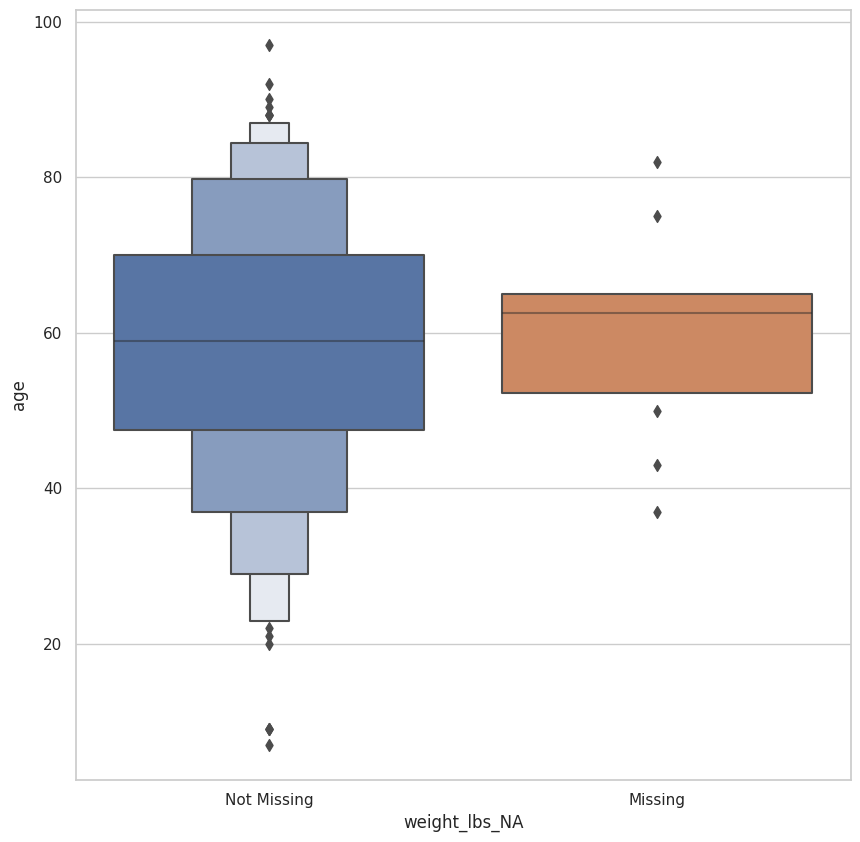

In [48]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df:(
            sns.boxenplot(
                data=df,
                x="weight_lbs_NA",
                y="age"
            )
        )
    )
)

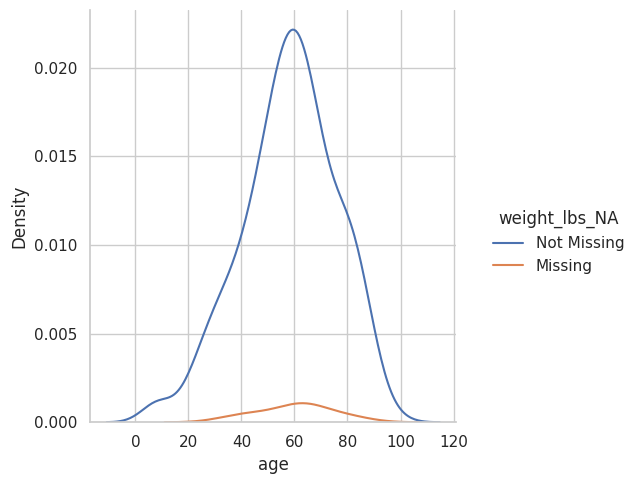

In [49]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x="age",
                hue="weight_lbs_NA",
                kind="kde"
            )
        )
    )
)

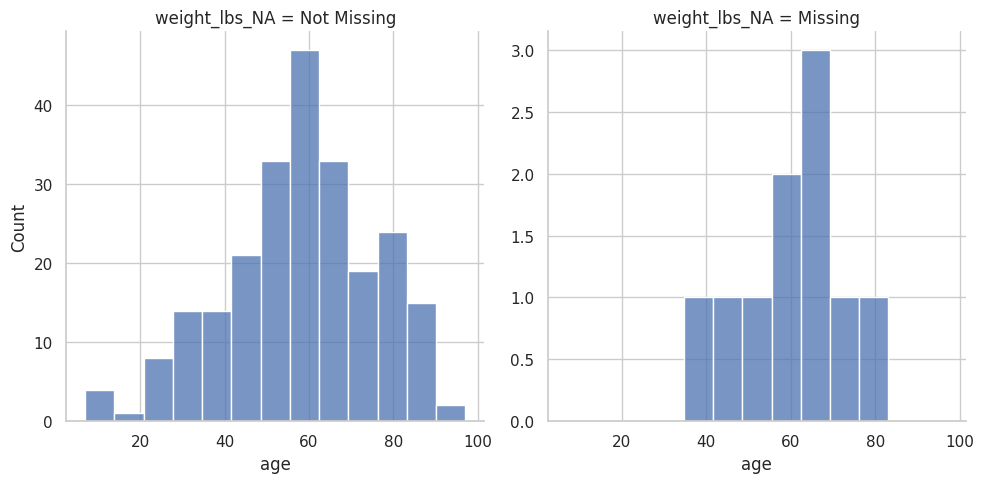

In [50]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x="age",
                col="weight_lbs_NA",
                facet_kws={
                    "sharey":False
                }
            )
        )
    )
)

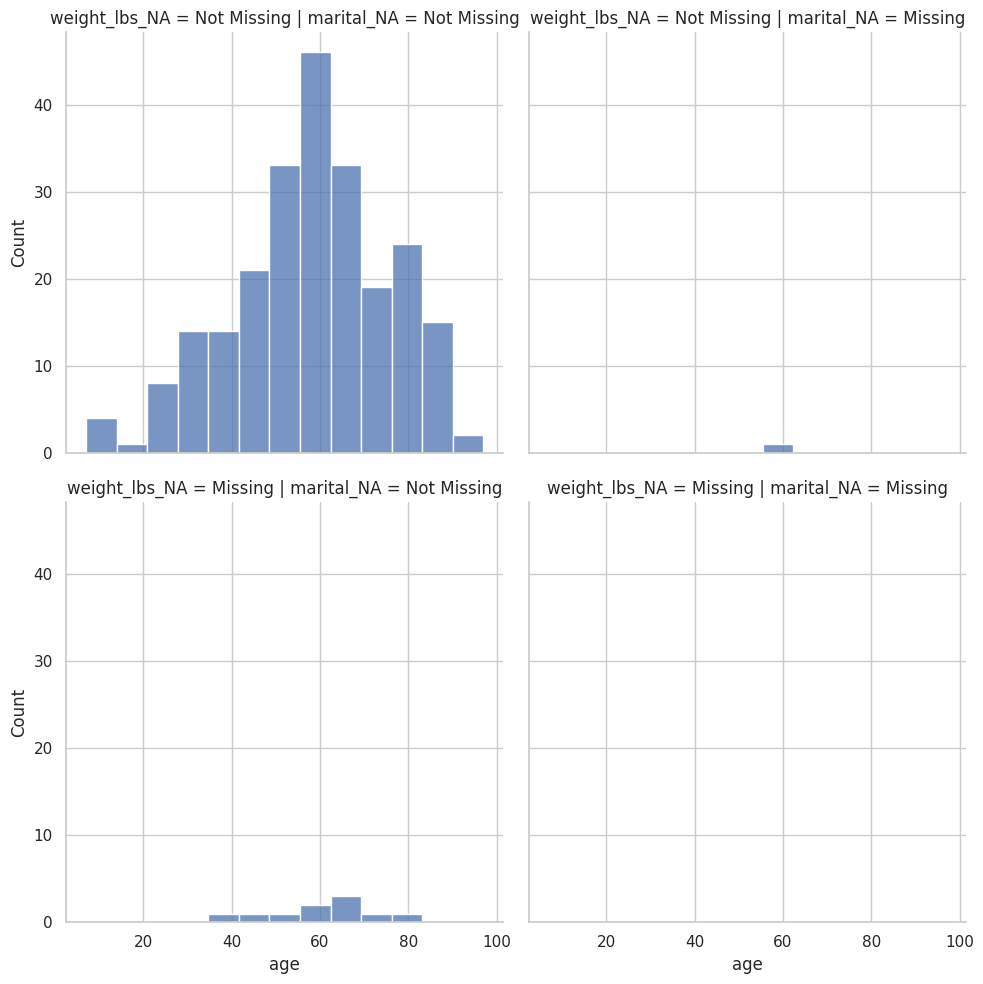

In [51]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x="age",
                col="marital_NA",
                row="weight_lbs_NA"
            )
        )
    )
)

## Visualización de valores faltantes en dos variables

In [52]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10,
    jitter: float=0.075,
    seed: int=42
) -> pd.Series:

    column = column.copy(deep=True)

    # Extract values metadata
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below

    # Create the "jitter" (noise) to be added around the points.
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data.
    column[missing_mask] = column_shift + column_jitter

    return column

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

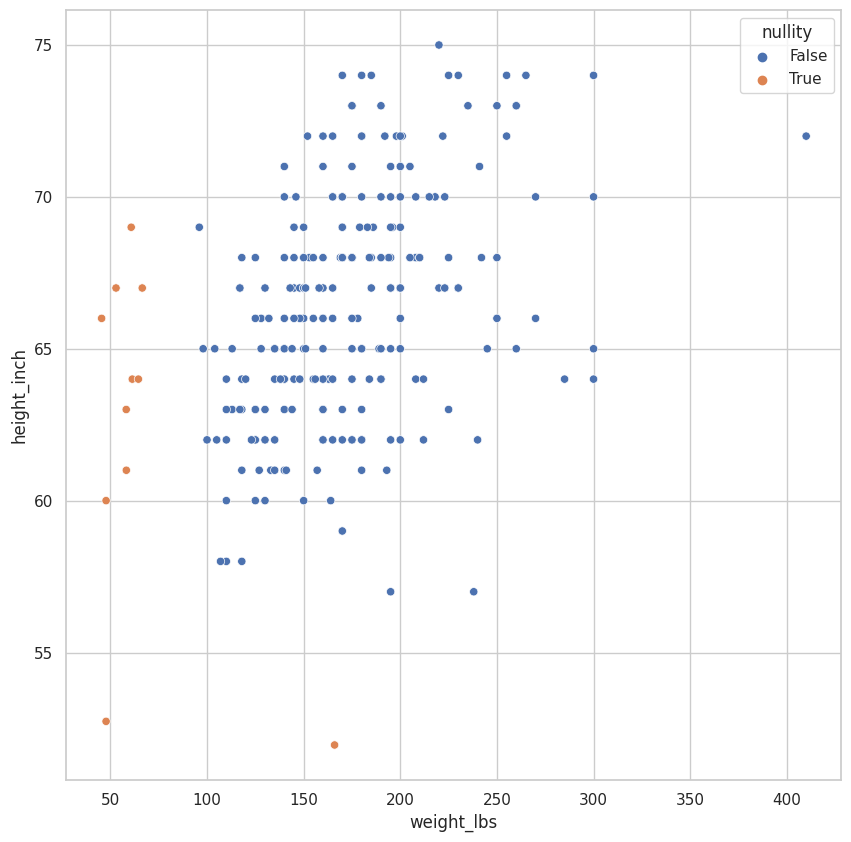

In [53]:
(
    riskfactors_df
    .select_dtypes(
        exclude="category"
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter = 0.075)
    )
    .assign(
        nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data = df,
                x = "weight_lbs",
                y = "height_inch",
                hue = "nullity"
            )
        )
    )
)

## Correlación de nulidad

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/matrix.py:316: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


<AxesSubplot:>

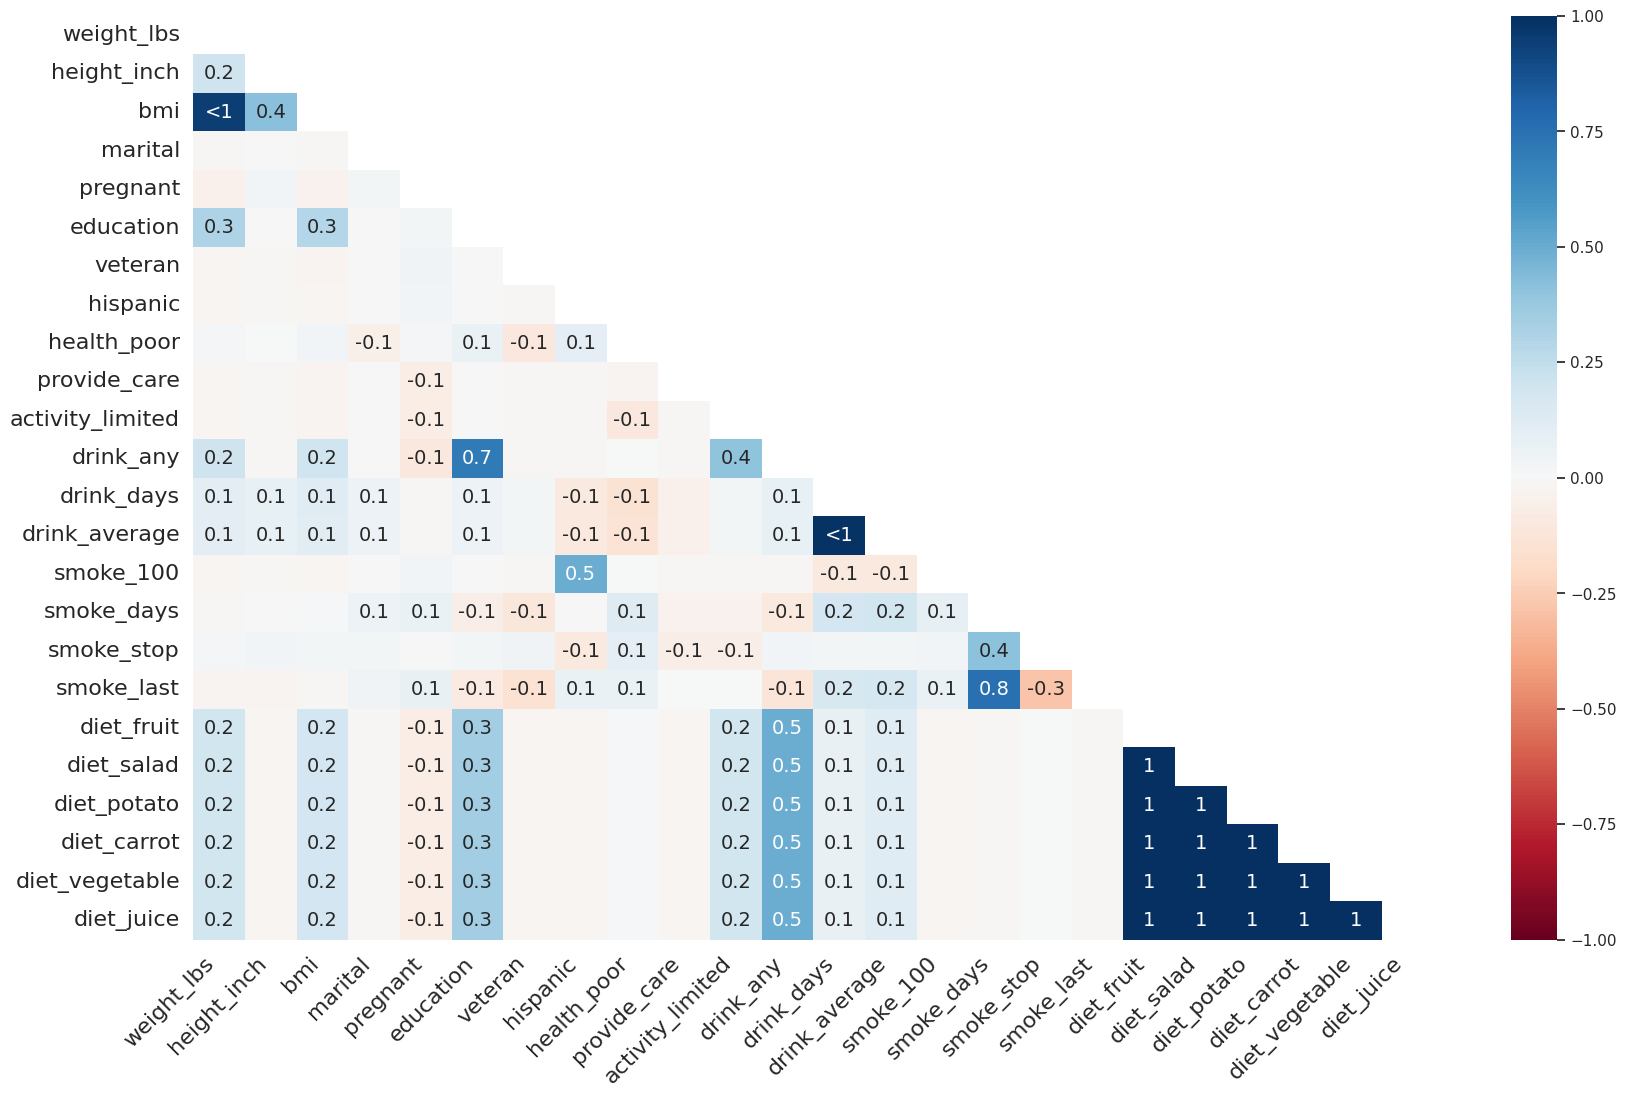

In [54]:
missingno.heatmap(
    df=riskfactors_df
)

/root/venv/lib/python3.9/site-packages/missingno/missingno.py:475: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)


<AxesSubplot:>

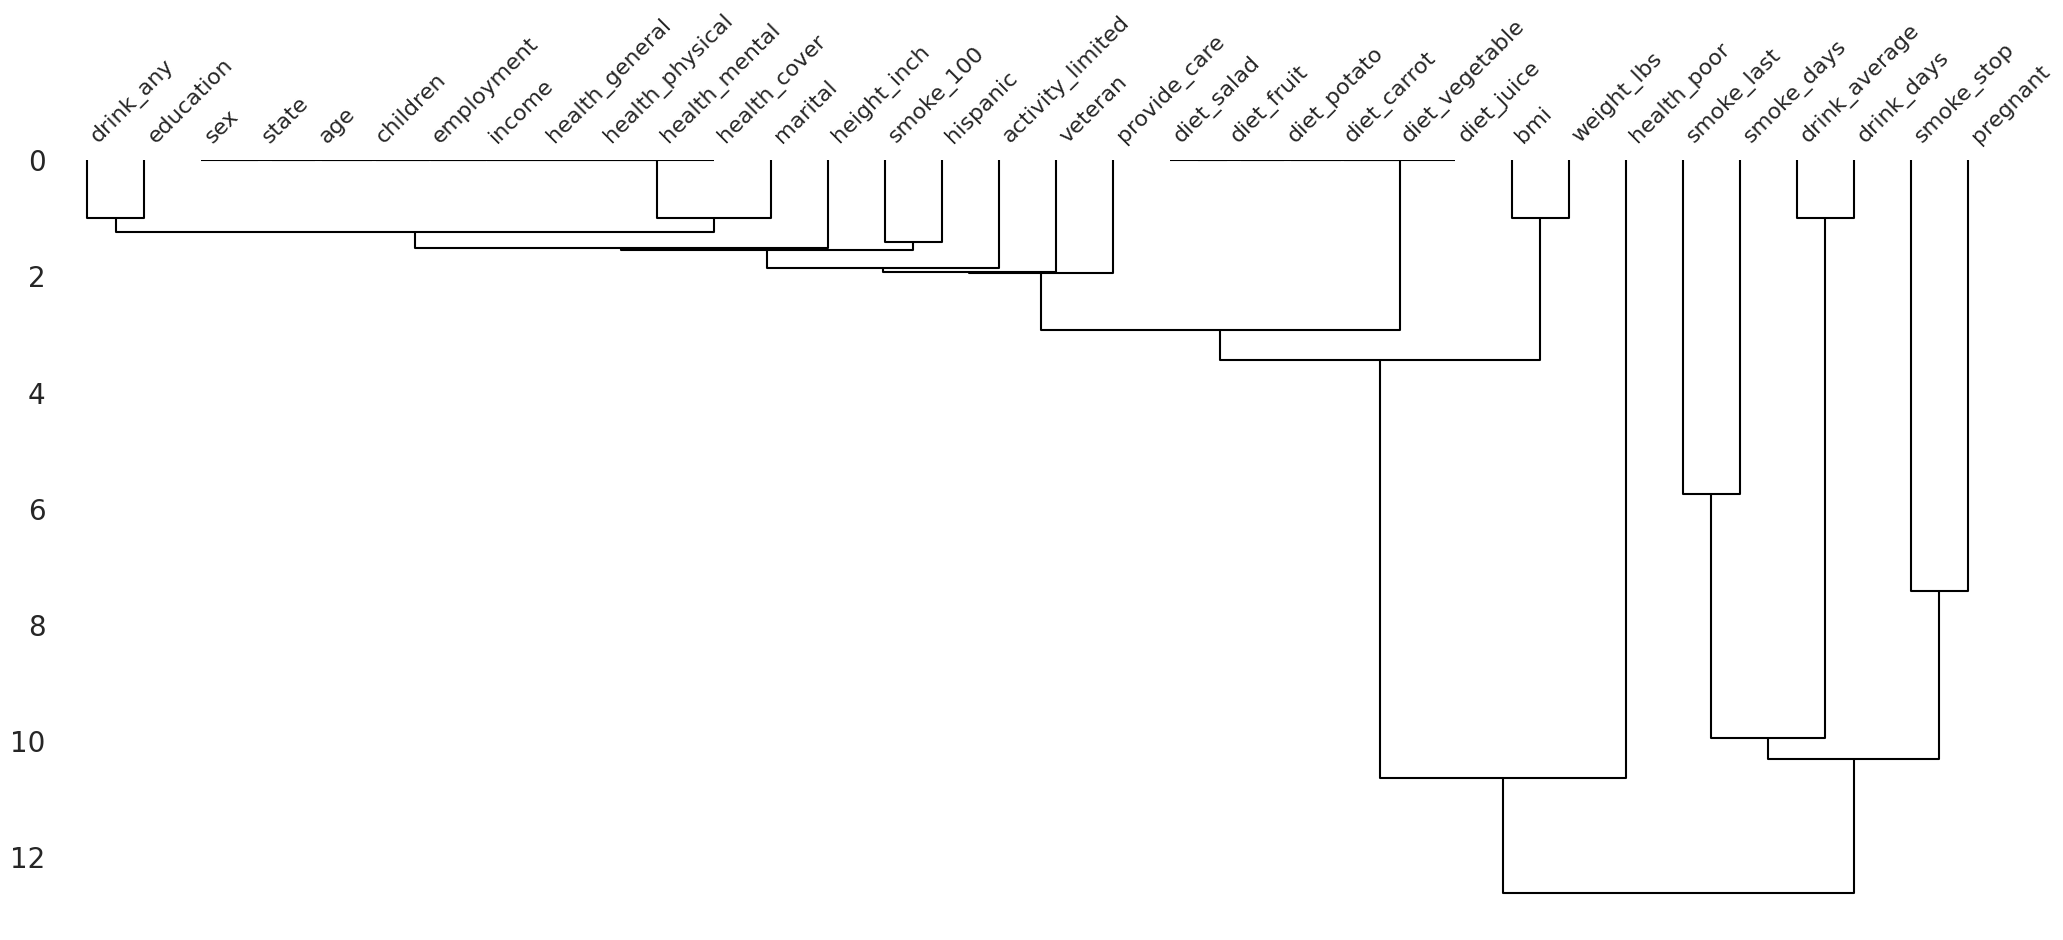

In [55]:
missingno.dendrogram(
    df=riskfactors_df
)

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

In [56]:
riskfactors_df.shape

(245, 34)

### _Pairwise deletion_ (eliminación por pares)

*Esto consiste en ignorar valores nulos para realziar operaciones como calculos de promedio, conteos, etc*

In [57]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

En este caso, en size se cuentan todos los datos. Mientras que en count() solo se cuentan los datos no nulos

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

*Este procedimiento consiste en borrar todo el registro (o fila) si es que hay un valor faltante*

#### Con base en 1 columna

In [58]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs"],
        how="any"
    )
)

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100 smoke_days smoke_stop smoke_last  \
0           0         6  ...        No        NaN        NaN        NaN   
1           0         5  ...        No        NaN        NaN        NaN   
2           0         4  ...        No        NaN        NaN        NaN   
3           1         6  ...        No        NaN        NaN        NaN   
4           0         5  ...       Yes   Everyday        Yes        NaN   
..        ...       ...  ...       ...        ...        ...        ...   
240         0         4  ...        No        NaN        NaN        NaN   
241         2         4  ...        No        NaN        NaN        NaN   
242         0         6  ...       Yes    Not@All        NaN          7   
243         0         4  ...       Yes   Everyday         No        NaN   
244         0         4  ...       Yes    Not@All        NaN          7   

    diet_fruit  diet_salad  diet_potato diet_carrot diet_vegetable diet_juice  
0         1095         261          104         156            521         12  
1           52         209           52           0             52          0  
2           36         156           52          24             24         24  
3          NaN         NaN          NaN         NaN            NaN        NaN  
4           -7         261          209         261            365        104  
..         ...         ...          ...         ...            ...        ...  
240         -7          -7           -7          -7             -7         -7  
241         52          52           52          24             52         24  
242        365         156          104          52            730        365  
243        730           0           24         156            104          0  
244         52         104           52           0            104        104  

[235 rows x 34 columns]

*Se borraron los registros si weight_lbs esta faltando*

#### Con base en 2 o más columnas

In [59]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
)

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100 smoke_days smoke_stop smoke_last  \
0           0         6  ...        No        NaN        NaN        NaN   
1           0         5  ...        No        NaN        NaN        NaN   
2           0         4  ...        No        NaN        NaN        NaN   
3           1         6  ...        No        NaN        NaN        NaN   
4           0         5  ...       Yes   Everyday        Yes        NaN   
..        ...       ...  ...       ...        ...        ...        ...   
240         0         4  ...        No        NaN        NaN        NaN   
241         2         4  ...        No        NaN        NaN        NaN   
242         0         6  ...       Yes    Not@All        NaN          7   
243         0         4  ...       Yes   Everyday         No        NaN   
244         0         4  ...       Yes    Not@All        NaN          7   

    diet_fruit  diet_salad  diet_potato diet_carrot diet_vegetable diet_juice  
0         1095         261          104         156            521         12  
1           52         209           52           0             52          0  
2           36         156           52          24             24         24  
3          NaN         NaN          NaN         NaN            NaN        NaN  
4           -7         261          209         261            365        104  
..         ...         ...          ...         ...            ...        ...  
240         -7          -7           -7          -7             -7         -7  
241         52          52           52          24             52         24  
242        365         156          104          52            730        365  
243        730           0           24         156            104          0  
244         52         104           52           0            104        104  

[234 rows x 34 columns]

*Se borraron los registros si weight_lbs y height_inch estan faltando*

In [60]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="all"
    )
)

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100 smoke_days smoke_stop smoke_last  \
0           0         6  ...        No        NaN        NaN        NaN   
1           0         5  ...        No        NaN        NaN        NaN   
2           0         4  ...        No        NaN        NaN        NaN   
3           1         6  ...        No        NaN        NaN        NaN   
4           0         5  ...       Yes   Everyday        Yes        NaN   
..        ...       ...  ...       ...        ...        ...        ...   
240         0         4  ...        No        NaN        NaN        NaN   
241         2         4  ...        No        NaN        NaN        NaN   
242         0         6  ...       Yes    Not@All        NaN          7   
243         0         4  ...       Yes   Everyday         No        NaN   
244         0         4  ...       Yes    Not@All        NaN          7   

    diet_fruit  diet_salad  diet_potato diet_carrot diet_vegetable diet_juice  
0         1095         261          104         156            521         12  
1           52         209           52           0             52          0  
2           36         156           52          24             24         24  
3          NaN         NaN          NaN         NaN            NaN        NaN  
4           -7         261          209         261            365        104  
..         ...         ...          ...         ...            ...        ...  
240         -7          -7           -7          -7             -7         -7  
241         52          52           52          24             52         24  
242        365         156          104          52            730        365  
243        730           0           24         156            104          0  
244         52         104           52           0            104        104  

[244 rows x 34 columns]

*Se borraron los registros si weight_lbs o height_inch estan faltando*

### Representación gráfica tras la eliminación de los valores faltantes

/root/venv/lib/python3.9/site-packages/missingno/missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/root/venv/lib/python3.9/site-packages/missingno/missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot:>

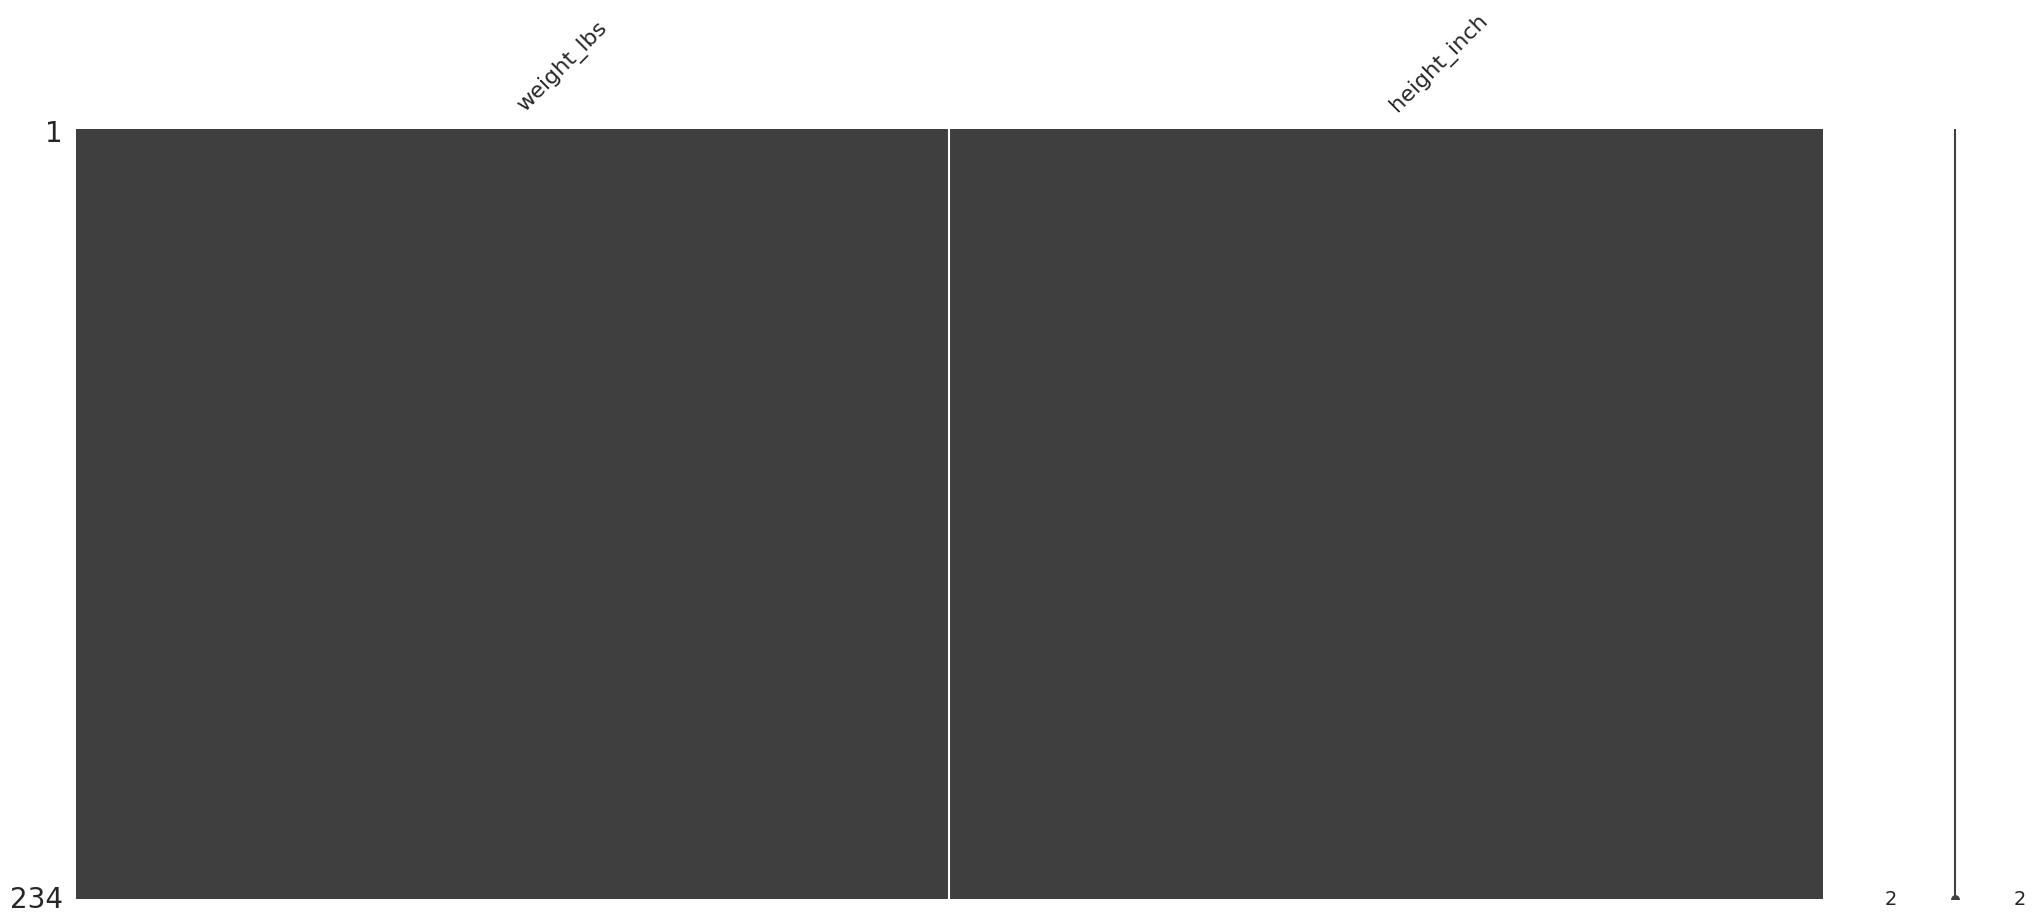

In [61]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(missingno.matrix)
)

*Se confirma en el grafico que no faltan datos*

# Imputación básica de valores faltantes

*Imputacion es reemplazar los datos faltantes por datos con sentido, puedes basarte en:*

- *algun estadistico que venga de los datos*
- *un valor por contexto*
- *un valor extraido de un modelo de machine learning*

### Imputación con base en el contexto

In [62]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

name       time  value
0        lynn    morning    350
1         NaN  afternoon    310
2       zelda    morning    320
3         NaN  afternoon    350
4  shadowsong    morning    310
5         NaN  afternoon    320

*En este caso, es obvio que hay que poner el mismo nombre de la fila previa en el valor faltante, eso es contexto.*

***Como se rellena de manera rapida?***

In [63]:
implicit_to_explicit_df.ffill()

name       time  value
0        lynn    morning    350
1        lynn  afternoon    310
2       zelda    morning    320
3       zelda  afternoon    350
4  shadowsong    morning    310
5  shadowsong  afternoon    320

### Imputación de un único valor

In [64]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
        # Basicamente se acaba de llenar el valor faltante con el promedio de su respectiva columna
    )
)

weight_lbs  height_inch    bmi  weight_lbs_NA  height_inch_NA  bmi_NA
0         190.0         64.0  32.68          False           False   False
1         170.0         68.0  25.90          False           False   False
2         163.0         64.0  28.04          False           False   False
3         230.0         74.0  29.59          False           False   False
4         135.0         62.0  24.74          False           False   False
..          ...          ...    ...            ...             ...     ...
240       144.0         63.0  25.56          False           False   False
241       170.0         74.0  21.87          False           False   False
242       175.0         71.0  24.46          False           False   False
243       138.0         64.0  23.74          False           False   False
244       200.0         70.0  28.76          False           False   False

[245 rows x 6 columns]

Basicamente se acaba de llenar el valor faltante con el promedio de su respectiva columna

visualizando ese procedimiento:

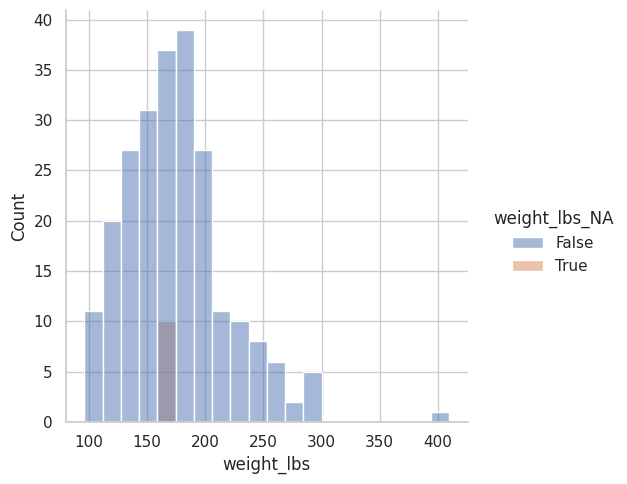

In [65]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
        # Basicamente se acaba de llenar el valor faltante con el promedio de su respectiva columna
    )
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="weight_lbs",
                hue="weight_lbs_NA"
            )
        )
    )
)

Se confirma que los valores faltantes ahora corresponden al promedio.

### Scatterplot con valores imputados

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

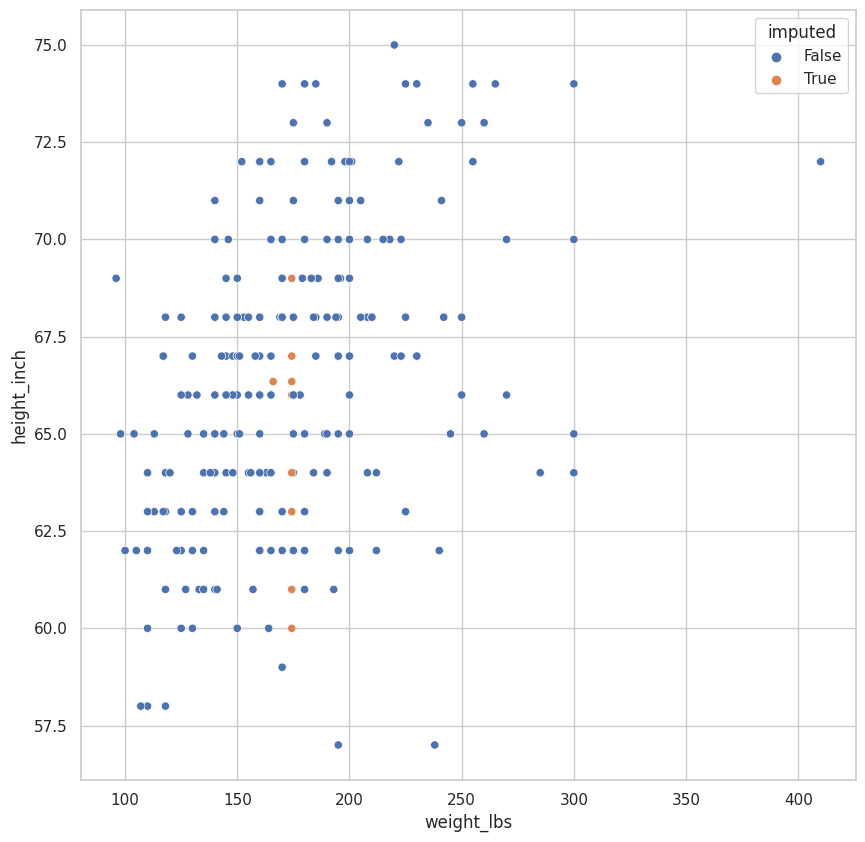

In [66]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="imputed"
            )
        )
    )
)

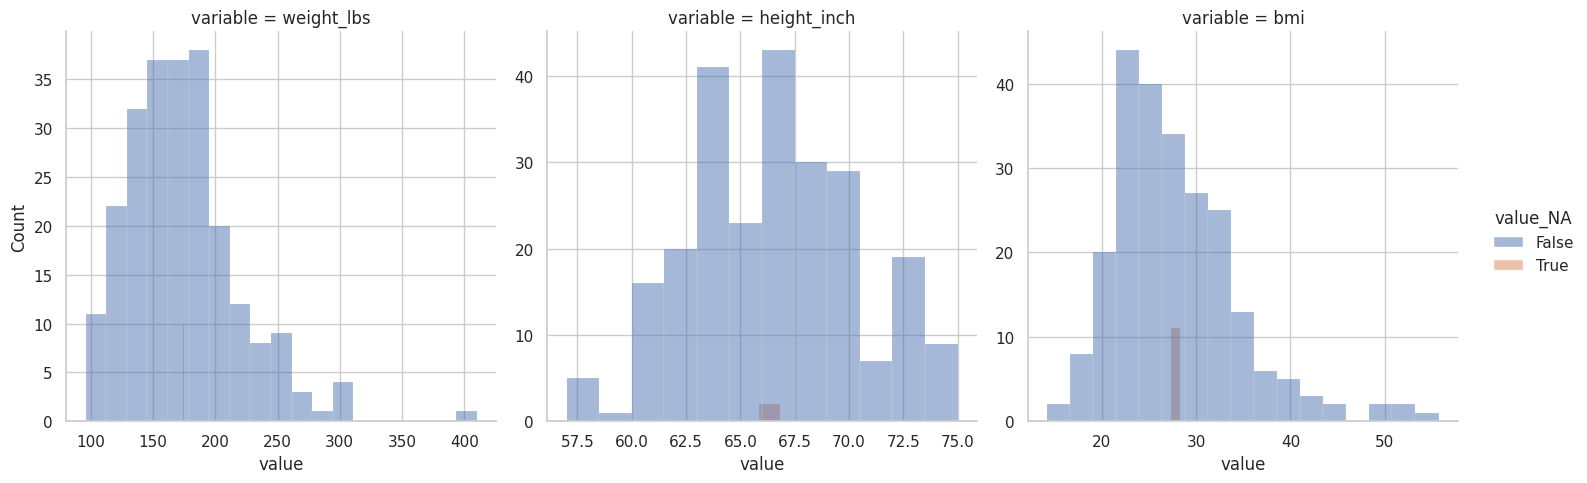

In [79]:
(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", "value"],
        names_to = "variable_NA",
        values_to = "value_NA"
    )
    .assign(
        valid=lambda df:df.apply(axis="columns", func = lambda column: column.variable in column.variable_NA)
    )
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="value",
                hue="value_NA",
                col="variable",
                common_bins=False,
                facet_kws={
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88e69cc2-7183-4901-8a73-87a9fd835077' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>